# Partie I

Objectifs :
- Créer un jeu de données ;
- Mettre le texte en minuscule ;
- Suppression de la ponctuation ;
- Séparation en tokens ;
- Visualisation du vocabulaire des articles classé par ordre décroissant avec un barplot ;
- Suppression des stopwords ;
- Visualisation du vocabulaire des articles classé par ordre décroissant avec un barplot après supression des stopwords ;
- Création d'une version avec stemming du document ;
- Visualisation du vocabulaire des articles classé par ordre décroissant avec un barplot après le stemming ;
- Création d'une version avec lemmatization du document ;
- Visualisation du vocabulaire des articles classé par ordre décroissant avec un barplot après la lemmatization ;


## Importations des packages

In [1]:
from nltk.tokenize import word_tokenize
from nltk.text import Text
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
import nltk

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Importations des données

Les données sont issue de [cette base de données](https://cs.nyu.edu/~kcho/DMQA/).

Maintenant que nos outils sont chargés, nous allons charger nos données.

Cliquez sur le lien ci-dessous :

https://drive.google.com/drive/folders/12OmusfAUOcoLOCwEc--nfkKQ5eEozU45?usp=sharing

Cliquer droit sur le dossier data et appuyer sur ajouter à mon drive.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Les données sont maintenant dans votre environnement collab.

In [3]:
import os
print(os.listdir('gdrive/MyDrive/Colab_Notebooks/Partie_1')[:10])

['0a3ff2f0a147c158845afa44d2a012064896566b.story', '0a3fff5779a8f7cfdde5d284a429ab89fd5e85df.story', '0a0f56ebc5a0a67ed18de79d99b40a42d8058d04.story', '0a3ad75d92c5bc2eccf2763df86afe5ddeffed75.story', '0a3f2400ba4e5cdf4b3638ae6fb60fdfa12a2680.story', '0a3f567efff9f0748b2758c9e8c17dc66beade04.story', '0a05b14962b2e73bbff82086762e0e23d32b359f.story', '0a1ad82d161d90d758240407cb8c8fcebff4a212.story', '0a4ec4d37683347ca62b53982d2c5f4efb86f444.story', '0a4b2d4ea5fb0625e3e747525062f0a85345e4df.story']


## Création de la base de données


In [7]:
import os
import string

# Dossier contenant les fichiers
dossier = 'gdrive/MyDrive/Colab_Notebooks/Partie_1'

# Fonction pour extraire les mots d'un fichier texte
def extraire_mots(fichier):
    try:
        with open(fichier, 'r', encoding='utf-8') as f:
            contenu = f.read()
        # Retirer les ponctuations et convertir en minuscules
        table = str.maketrans('', '', string.punctuation)
        mots = contenu.translate(table).lower().split()
        return mots
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier {fichier}: {e}")
        return []

# Liste des fichiers dans le dossier
fichiers = os.listdir(dossier)

# Base de données de mots
base_de_donnees = {}

# Parcourir tous les fichiers du dossier
for fichier in fichiers:
    chemin_fichier = os.path.join(dossier, fichier)
    if os.path.isfile(chemin_fichier):  # Vérifie que c'est un fichier
        mots = extraire_mots(chemin_fichier)
        for mot in mots:
            if mot in base_de_donnees:
                base_de_donnees[mot] += 1
            else:
                base_de_donnees[mot] = 1

# Affichage des 10 premiers mots et leur fréquence
for mot, freq in list(base_de_donnees.items())[:10]:
    print(f"{mot}: {freq}")

# Enregistrer la base de données dans un fichier texte
with open('base_de_donnees_mots.txt', 'w', encoding='utf-8') as f:
    for mot, freq in sorted(base_de_donnees.items()):
        f.write(f"{mot}: {freq}\n")

print("Base de données de mots créée et enregistrée dans 'base_de_donnees_mots.txt'")


Base de données de mots créée et enregistrée dans 'base_de_donnees_mots.txt'


## En minuscule

In [13]:
# Nom du fichier à traiter
fichier_source = 'base_de_donnees_mots.txt'
fichier_destination = 'base_de_donnees_mots_minuscule.txt'

# Lire le fichier source
with open(fichier_source, 'r', encoding='utf-8') as f:
    lignes = f.readlines()

# Convertir chaque mot en minuscule
lignes_minuscule = [ligne.lower() for ligne in lignes]

# Écrire dans le fichier de destination
with open(fichier_destination, 'w', encoding='utf-8') as f:
    f.writelines(lignes_minuscule)

print(f"Tous les mots ont été convertis en minuscules et enregistrés dans '{fichier_destination}'")


Tous les mots ont été convertis en minuscules et enregistrés dans 'base_de_donnees_mots_minuscule.txt'


## Tokenization

In [27]:
import re

try:
    with open(fichier_destination, 'r', encoding='utf-8') as f:
        contenu = f.read()

    # Tokenisation : extraire uniquement les mots avec une expression régulière
    tokens = re.findall(r'\b\w+\b', contenu.lower())  # Utilise .lower() pour uniformiser en minuscules

    # Afficher les 10 premiers tokens
    print("Les 10 premiers tokens sont :")
    print(tokens[:10])

    # Optionnel : Enregistrer les tokens dans un fichier
    with open('tokens_base_de_donnees.txt', 'w', encoding='utf-8') as f:
        for token in tokens:
            f.write(token + '\n')

    print("Les tokens ont été enregistrés dans 'tokens_base_de_donnees.txt'.")

except FileNotFoundError:
    print(f"Le fichier '{fichier_destination}' n'existe pas.")
except Exception as e:
    print(f"Une erreur s'est produite : {e}")
    # Compter le nombre de mots dans la liste
nombre_de_mots = len(tokens_stemmes)

# Afficher le résultat
print(f"La liste contient {nombre_de_mots} mots.")

Les 10 premiers tokens sont :
['0', '1', '1', '15', '10', '13', '100', '10', '1000', '1']
Les tokens ont été enregistrés dans 'tokens_base_de_donnees.txt'.
La liste contient 6423 mots.


## Visualization du vocabulaire

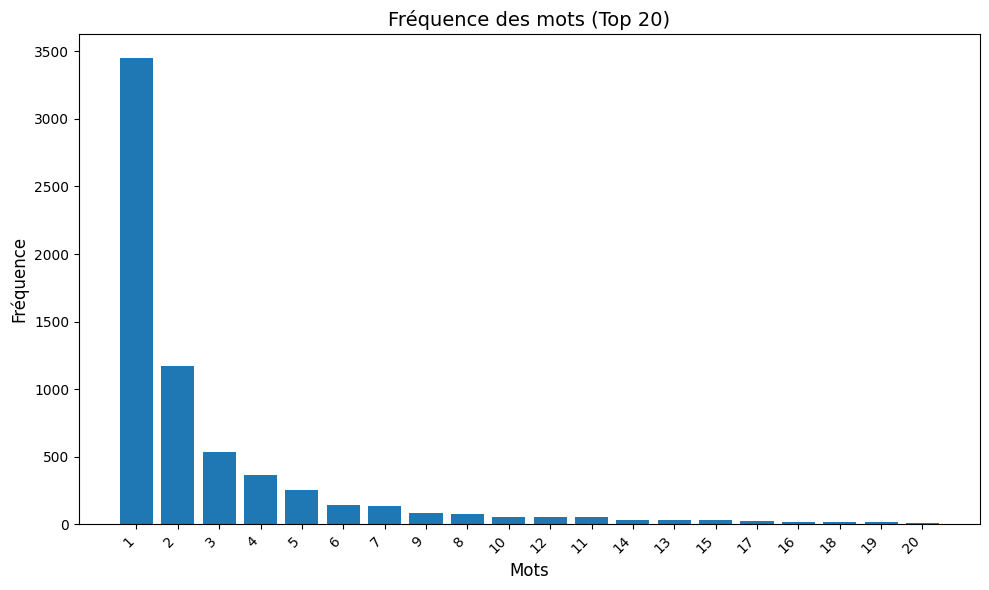

In [20]:
import matplotlib.pyplot as plt
from collections import Counter
import re

# Nom du fichier contenant les tokens
fichier_tokens = 'tokens_base_de_donnees.txt'

try:
    # Lire les tokens depuis le fichier
    with open(fichier_tokens, 'r', encoding='utf-8') as f:
        tokens = f.read().splitlines()

    # Compter la fréquence des tokens
    token_freq = Counter(tokens)

    # Trier par ordre décroissant
    vocabulaire_trie = token_freq.most_common()

    # Extraire les mots et leurs fréquences pour le graphique
    mots, frequences = zip(*vocabulaire_trie[:20])  # Top 20 tokens pour un affichage clair

    # Création du barplot
    plt.figure(figsize=(10, 6))
    plt.bar(mots, frequences)
    plt.xlabel("Mots", fontsize=12)
    plt.ylabel("Fréquence", fontsize=12)
    plt.title("Fréquence des mots (Top 20)", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Le fichier '{fichier_tokens}' n'existe pas.")
except Exception as e:
    print(f"Une erreur s'est produite : {e}")


## Les stopwords

In [31]:
from nltk.corpus import stopwords
import re

# Assurez-vous de télécharger les stop words (si nécessaire)
# import nltk
# nltk.download('stopwords')

# Liste des stop words en français
stop_words = set(stopwords.words('english'))

# Suppression des stop words et des chiffres
tokens_sans_stopwords_et_chiffres = [
    token for token in tokens
    if token not in stop_words and not re.match(r'^\d+$', token)
]

# Vérification
print("Tokens après suppression des stop words et des chiffres (10 premiers) :")
print(tokens_sans_stopwords_et_chiffres[:10])
# Compter le nombre de mots dans la liste
nombre_de_mots = len(tokens_sans_stopwords_et_chiffres)

# Afficher le résultat
print(f"La liste contient {nombre_de_mots} mots.")


Tokens après suppression des stop words et des chiffres (10 premiers) :
['100yard', '10day', '11yard', '12yearold', '13day', '13th', '13yearolds', '14410foot', '14for27', '16hour']
La liste contient 6423 mots.


## Stemming

In [33]:
from nltk.stem.snowball import SnowballStemmer

# Choisissez la langue pour le stemming (par exemple, 'french')
stemmer = SnowballStemmer("english")

# Appliquer le stemming à la liste après suppression des stop words et chiffres
tokens_stemmes_apres_filtrage = [stemmer.stem(token) for token in tokens_sans_stopwords_et_chiffres]

# Afficher les 10 premiers tokens après stemming
print("Tokens après suppression des stop words, chiffres et application du stemming (10 premiers) :")
print(tokens_stemmes_apres_filtrage[:10])

# Compter le nombre total de mots après stemming
nombre_de_mots_apres_stemming = len(tokens_stemmes_apres_filtrage)
print(f"La liste après stemming contient {nombre_de_mots_apres_stemming} mots.")



Tokens après suppression des stop words, chiffres et application du stemming (10 premiers) :
['100yard', '10day', '11yard', '12yearold', '13day', '13th', '13yearold', '14410foot', '14for27', '16hour']
La liste après stemming contient 6423 mots.


## Lemmatization

In [35]:
from nltk.stem import WordNetLemmatizer
import nltk

# Télécharger les données nécessaires pour lemmatizer si non déjà fait
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Initialiser le lemmatizer
lemmatizer = WordNetLemmatizer()

# Appliquer la lemmatisation à chaque token
tokens_lemmatizes = [lemmatizer.lemmatize(token) for token in tokens_sans_stopwords_et_chiffres]

# Afficher les 10 premiers tokens après lemmatisation
print("Tokens après suppression des stop words, chiffres et application de la lemmatisation (10 premiers) :")
print(tokens_lemmatizes[:10])

# Compter le nombre total de mots après lemmatisation
nombre_de_mots_apres_lemmatisation = len(tokens_lemmatizes)
print(f"La liste après lemmatisation contient {nombre_de_mots_apres_lemmatisation} mots.")


Tokens après suppression des stop words, chiffres et application de la lemmatisation (10 premiers) :
['100yard', '10day', '11yard', '12yearold', '13day', '13th', '13yearolds', '14410foot', '14for27', '16hour']
La liste après lemmatisation contient 6423 mots.


# Partie II - Détecter le language du texte grâce au stopwords

Les stopwords sont les mots les plus utilisés dans un texte grâce à eux essayé de prédire la langue du texte.

Prédire pour cinq languages :
- Français ;
- Anglais ;
- Espagnol ;
- Italien ;
- Russe.

Vérifier le nombre de stopwords de chaque langue dans un texte. La langue prédit sera celle avec le plus de stopwords.

Vous pourrez trouver de l'aide via ce [lien](https://www.nltk.org/book/ch02.html).


## Importation des données

Les données proviennent de ce [jeux de données](https://zenodo.org/record/841984#.X_Jb2ulKjBI).

In [40]:
x_text = pd.read_csv('gdrive/MyDrive/Colab_Notebooks/Partie_2/x_text.csv')
y_text = pd.read_csv('gdrive/MyDrive/Colab_Notebooks/Partie_2/y_text.csv')
print(x_text.shape)
print(y_text.shape)

(2500, 1)
(2500, 1)


In [37]:
x_text.head()

,text
0,16 апреля 2009 года в Шатойском районе произош...
1,La ciudad de San Cristóbal es sede del Hospita...
2,Les supporters de l'ASM Clermont Auvergne ont ...
3,Anton (or Antonius) Maria Schyrleus (also Schy...
4,"Ralph Staub est un réalisateur, producteur, sc..."


In [38]:
lang = np.unique(y_text)
print(lang)

['english' 'french' 'italian' 'russian' 'spanish']
